# Generating thousands of images

These landscapes will be used to train generative ML models. Therefore, we need a few thousand images for training and testing. This notebook will have similar commands as the `Example` notebook, but will make many images with the same format and save them all.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import LandscapeGenerator as LG

In [3]:
np.random.seed(12345678)

In [4]:
#Setting up the field of view
field_of_view = np.zeros((2, 2))
field_of_view[0, 0:2] = -15, 30
field_of_view[1, 0:2] = 0, 360
M = 16
N = 128 #this is equal to (360/45) * 16
dimensions = [M, N]
print("Field of view (degrees)")
print("Vertical direction:   ", field_of_view[0])
print("Horizontal direction: ", field_of_view[1])

Field of view (degrees)
Vertical direction:    [-15.  30.]
Horizontal direction:  [  0. 360.]


In [5]:
L = LG.LGenerator(dimensions, 
                  field_of_view=field_of_view)

In [6]:
#Add features to the landscape
L.clear_features() #Only need this line if you want to make a new landscape
L.add_feature(LG.SkyFeature(rgb_means = [20, 100, 200], rgb_SDs = [5, 5, 5]))
L.add_feature(LG.SkyFeature(theta_boundary = 10, rgb_means = [20, 80, 160], rgb_SDs = [5, 5, 5]))
L.add_feature(LG.SkyFeature(theta_boundary = 20, rgb_means = [5, 40, 120], rgb_SDs = [5, 5, 5]))

L.add_feature(LG.GrassFeature(theta_boundary = 0))
L.add_feature(LG.GrassFeature(theta_boundary = -5, rgb_means=[50, 200, 70]))
L.add_feature(LG.SunFeature(theta = 10*np.random.rand(), phi = field_of_view[1, 1] * np.random.rand()))

L.add_feature(LG.SkyGradientFeature(rgb_peaks = [150, 0, 50]))

#Create tree features
#sort them by distance from the viewer
#add them to the landscape
trees = [LG.TreeFeature(height = 6 + 2*np.random.rand(), 
                        branch_radius = 1.5 + np.random.rand(),
                        distance = 6 + 40 * np.random.rand(),
                        phi = field_of_view[1, 1] * np.random.rand(), 
                        leaf_rgb_means = [80,160,110] + 20*np.random.randn(3),
                        trunk_rgb_means = [105,75,50] + 5*np.random.randn(3)) for _ in range(25)]
trees.sort(key = lambda x: x.distance, reverse=True)
for t in trees:
    L.add_feature(t)

In [7]:
N_pics = 10
data = np.zeros((N_pics, M, N, 3))

for i in range(N_pics):
    L.clear_features() #Only need this line if you want to make a new landscape
    L.add_feature(LG.SkyFeature(rgb_means = [20, 100, 200], rgb_SDs = [5, 5, 5]))
    L.add_feature(LG.SkyFeature(theta_boundary = 10, rgb_means = [20, 80, 160], rgb_SDs = [5, 5, 5]))
    L.add_feature(LG.SkyFeature(theta_boundary = 20, rgb_means = [5, 40, 120], rgb_SDs = [5, 5, 5]))

    L.add_feature(LG.GrassFeature(theta_boundary = 0))
    L.add_feature(LG.GrassFeature(theta_boundary = -5, rgb_means=[50, 200, 70]))
    L.add_feature(LG.SunFeature(theta = 10*np.random.rand(), phi = field_of_view[1, 1] * np.random.rand()))

    L.add_feature(LG.SkyGradientFeature(rgb_peaks = [150, 0, 50]))

    #Create tree features
    #sort them by distance from the viewer
    #add them to the landscape
    trees = [LG.TreeFeature(height = 6 + 2*np.random.rand(), 
                            branch_radius = 1.5 + np.random.rand(),
                            distance = 6 + 40 * np.random.rand(),
                            phi = field_of_view[1, 1] * np.random.rand(), 
                            leaf_rgb_means = [80,160,110] + 20*np.random.randn(3),
                            trunk_rgb_means = [105,75,50] + 5*np.random.randn(3)) for _ in range(25)]
    trees.sort(key = lambda x: x.distance, reverse=True)
    for t in trees:
        L.add_feature(t)
    data[i] = L.generate()
np.save(f"panoramas_{M}x{N}_Npics{N_pics}_rgb", data)

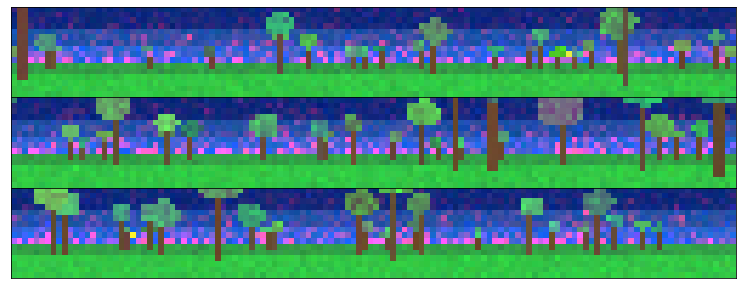

In [8]:
#Visualize
fig, ax = plt.subplots(3, 1, figsize=(20, 5))
plt.subplots_adjust(hspace=0)
ax[2].set_xticks([])
ax[2].set_xticklabels([])
for i in range(3):
    ax[i].set_yticks([])
    ax[i].set_yticklabels([])
    ax[i].imshow(data[np.random.randint(low = 0, high = 10)])